# Incorporating current data into charts

In [2]:
# general
import numpy as np, numpy.ma as ma
import xarray as xr
import pandas as pd

# time
from datetime import datetime, timedelta
import matplotlib.dates as mdates

# local system 
import sys  
import glob
import os

# plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.colors
import cmocean

# geo plotting
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeat

# for use in suppressing repeated warnings when mapping w/ shapely
import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

# path to own functions
sys.path.append('../Libraries_functions/')
from LIB_ASI_SIC_UniB import grab_ASI_SIC, grab_projinfo_SIC
from LIB_geo_func import *
from LIB_geo_plot import *


# OSI SAF sea ice drift
from LIB_OSI_SAF import grab_projinfo_OSISAF, grab_OSISAF_drift

# NSIDC sea ice drift
from LIB_PPdrift_NSIDC0116 import grab_projinfo_PPdrift

# ERA5
# from LIB_access_ERA5 import grab_ERA5, fix_cartopy_vectors

%load_ext autoreload
%autoreload 2
# potentially uninstall pyhdf?

# math
import math

#import shapely
import shapely
from shapely import Polygon, geometry
from shapely.geometry import Point

In [1]:
# pick a date
date_list2 = pd.date_range(datetime(2016, 12, 1, 0), datetime(2017, 1, 31, 23), freq="30min")

#importing the dataset

path1 = "/Users/reu/Box/Data/M1/M1_ocean_currents_2016_2017.nc"
path2 = "/Users/reu/Box/Data/M1/M1_ocean_currents_2017_2019.nc"
ds = xr.open_mfdataset([path1, path2])
ds.close

u = ds.u.sel(time=slice(date_list2[0] , date_list2[-1])).mean(dim='depth')
v = ds.v.sel(time = slice(date_list2[0], date_list2[-1])).mean(dim = 'depth')

u_along = np.cos(157.5 * np.pi/180)
v_along = np.sin(157.5 * np.pi/180)
vector_proj = (u_along * u.values) + (v_along * v.values)

fig, ax = plt.subplots(figsize = (20, 5))
plt.plot(date_list2, vector_proj)
ax.set_xticks(date_list)
n = 10  # Keeps every 4th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]

plt.title(f'current along ESE direction', fontsize=12)

# d = {'time': date_list, 'u': u, 'Tmin_C': df_upwelling.Tmin.values[time_range], 'Tmax_C': df_upwelling.Tmax.values[time_range]}
# df = pd.DataFrame(data=d)
# df.to_csv(f'/Users/reu/Box/Data/{date_list[-1].year}currents_bidaily.csv', index=None) #removes Index column


NameError: name 'pd' is not defined

In [16]:
path1 = "/Users/reu/Box/Data/M1/M1_ocean_tempsalinity_2016_2017.nc"
path2 = "/Users/reu/Box/Data/M1/M1_ocean_tempsalinity_2017_2019.nc"
ds2 = xr.open_mfdataset([path1, path2])
ds2.close

path1 = "/Users/reu/Box/Data/M1/M1_ocean_currents_2016_2017.nc"
path2 = "/Users/reu/Box/Data/M1/M1_ocean_currents_2017_2019.nc"
ds = xr.open_mfdataset([path1, path2])
ds.close

# ===============
# Get a list of all CSV files in a directory
csv_files = ["/Users/reu/Box/Data/2019angles_hourly.csv"]

# Create an empty dataframe to store the combined data
df_combined = pd.DataFrame()

# Loop through each CSV file and append its contents to the combined dataframe
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df_combined = pd.concat([df_combined, df])

# ===============

# df_combined.projlist.values

## wind projection vs current projection

In [ ]:
path1 = "/Users/reu/Box/Data/M1/M1_ocean_tempsalinity_2016_2017.nc"
path2 = "/Users/reu/Box/Data/M1/M1_ocean_tempsalinity_2017_2019.nc"
ds2 = xr.open_mfdataset([path1, path2])
ds2.close

path1 = "/Users/reu/Box/Data/M1/M1_ocean_currents_2016_2017.nc"
path2 = "/Users/reu/Box/Data/M1/M1_ocean_currents_2017_2019.nc"
ds = xr.open_mfdataset([path1, path2])
ds.close

# ===============
# Get a list of all CSV files in a directory
csv_files = ["/Users/reu/Box/Data/2017angles_hourly.csv"]

# Create an empty dataframe to store the combined data
df_combined = pd.DataFrame()

# Loop through each CSV file and append its contents to the combined dataframe
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df_combined = pd.concat([df_combined, df])

# ===============

u = ds.u.sel(time=slice(datetime(2016,12,1), datetime(2017,1,31,23))).mean(dim='depth')
v = ds.v.sel(time = slice(datetime(2016,12,1), datetime(2017,1,31,23))).mean(dim = 'depth')

u_along = np.cos(157.5 * np.pi/180)
v_along = np.sin(157.5 * np.pi/180)
vector_proj = (u_along * u.values) + (v_along * v.values)

hourly_temps = ds2.T.sel(time=slice(datetime(2016,12,1), datetime(2017,1,31,23))).mean(dim='depth').values[::2]

hourly_proj = vector_proj[::2]


fig, ax = plt.subplots(figsize=(5,5))
# plt.scatter(df.projlist.values, hourly_proj * (hourly_temps + 1.8), s=1) #think of this as heat flux, current, etc. wind correlates to temperature in the current.
# plt.scatter(df.projlist.values, hourly_temps, s=1) # you don't really see much correlation
plt.scatter(df.projlist.values, hourly_proj, s=1) # you see a correlation between the wind and the current!
# plt.set_xlabel("ESE Wind (m/s)")

# d = {'wind_proj': df.projlist.values, 'current_proj': hourly_proj}
# df = pd.DataFrame(data=d)
# df.to_csv(f'/Users/reu/Box/Data/2017_wind_current_scatter.csv', index=None) #removes Index column

In [27]:
ds.u

<xarray.DataArray 'u' (depth: 26, time: 34898)>
dask.array<concatenate, shape=(26, 34898), dtype=float64, chunksize=(26, 26209), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float64 -35.3 -33.3 -31.3 -30.0 ... -6.0 -5.3 -4.0 -3.3
  * time     (time) datetime64[ns] 2016-10-01 2016-10-01T00:30:00 ... 2019-03-31

# all wind proj vs current proj

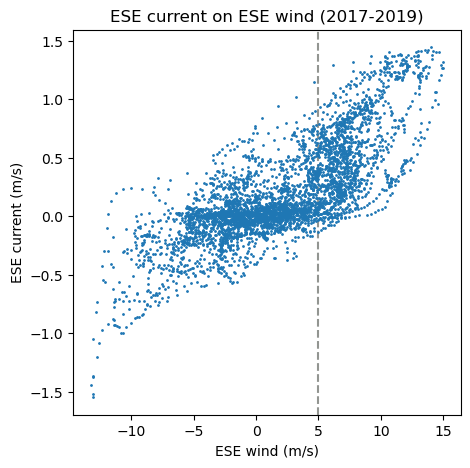

In [5]:
#scipy
from scipy import stats

# ===============
# Get a list of all CSV files in a directory
csv_files = ['/Users/reu/Box/Data/2017_wind_current_scatter.csv', 
             '/Users/reu/Box/Data/2018_wind_current_scatter.csv', '/Users/reu/Box/Data/2019_wind_current_scatter.csv']

# Create an empty dataframe to store the combined data
df_combined = pd.DataFrame()

# Loop through each CSV file and append its contents to the combined dataframe
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df_combined = pd.concat([df_combined, df])

fig, ax = plt.subplots(figsize=(5,5))
x = df_combined.wind_proj
y = df_combined.current_proj
plt.scatter(x, y, s=1, zorder = 3) # you see a correlation between the wind and the current!
# plt.scatter(df_combined.current_proj, df_combined.wind_proj, s=1) # you see a correlation between the wind and the current!
plt.ylabel("ESE current (m/s)")
plt.xlabel("ESE wind (m/s)")
plt.title("ESE current on ESE wind (2017-2019)")
ax.axvline(x=5, ymin=0, color = 'xkcd:grey', linestyle = '--', zorder = 1)

# #calculating stats
# array_x = np.array(x)
# array_y = np.array(y)
# ziplist = (zip(array_x, array_y))
        
# slope, intercept, rvalue, pvalue, stderr = stats.linregress(x,y)
# plt.plot(array_x, slope*array_x+intercept, color = 'black')
# plt.annotate("y=%.3fx+%.3f\nR$^2$=%.3f\np=%.3f"%(slope,intercept,rvalue**2,pvalue),xy=(1.2,0.7),xycoords='figure fraction')

Text(0.5, 0.98, 'Polynya area and extent, temperature for 2019 polynya')

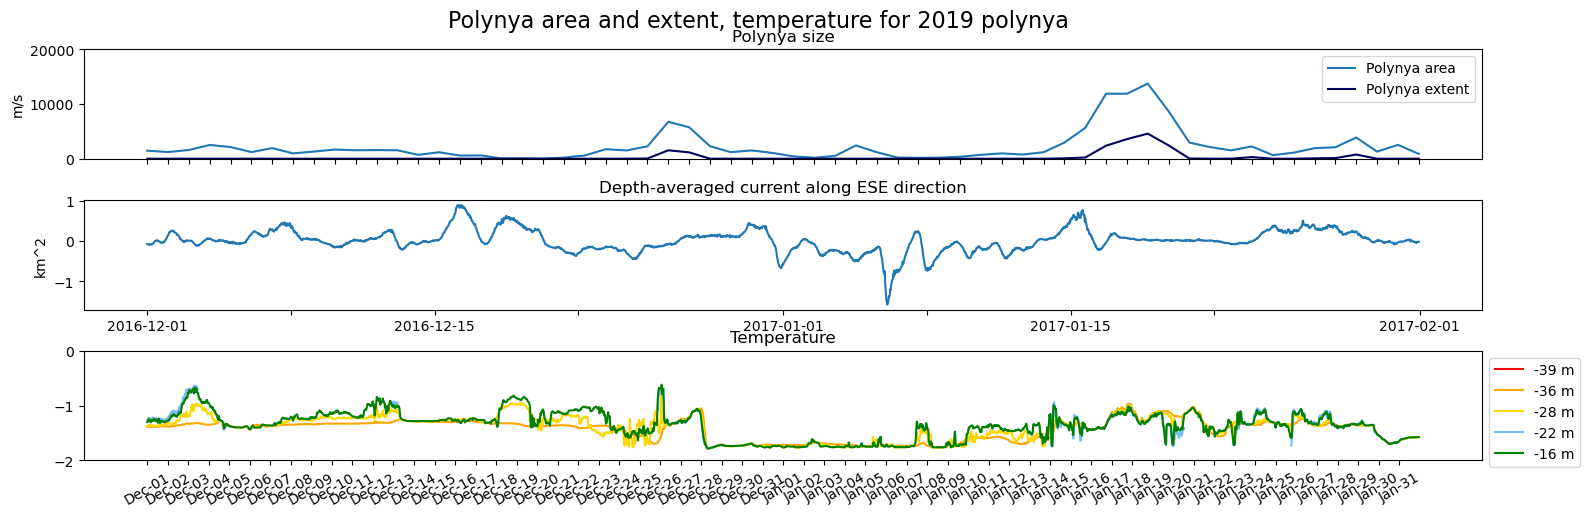

In [3]:
# stacked

df_daily_size = pd.read_csv("/Users/reu/Box/Data/2019SIC.csv")
time_daily = pd.to_datetime(df_daily_size.time)

path1 = "/Users/reu/Box/Data/M1/M1_ocean_tempsalinity_2016_2017.nc"
path2 = "/Users/reu/Box/Data/M1/M1_ocean_tempsalinity_2017_2019.nc"
ds = xr.open_mfdataset([path1, path2])
ds.close

temps = ds.T.sel(time = slice(datetime(2018,12,1), datetime(2019,1,31,23)))

date_list = pd.date_range(datetime(2018, 12, 1, 0), datetime(2019, 1, 31, 23))


fig, ax = plt.subplots(3, 1, figsize = (15,5))

labeldata = ("m/s", "km^2")

for i, (unit) in enumerate(labeldata):
    ax[i].set_ylabel(unit)
    # ax[i].axvspan(datetime(2011, 1,3), datetime(2011, 1, 8), facecolor='lightgray', alpha=0.2)
plt.tight_layout()
fig.subplots_adjust(top=.9)

ax[0].plot(time_daily, df_daily_size.Open_water_area_km2, 'tab:blue', label='Polynya area')
ax[0].plot(time_daily, df_daily_size.Open_water_extent_km2, 'xkcd:dark blue', label='Polynya extent')
ax[0].set_title('Polynya size')
ax[0].set_ylim(0,20000)
ax[0].set_xticklabels([])
ax[0].set_xticks(date_list)
ax[0].legend()

# =========================
# depth averaged current from above

# pick a date
date_list2 = pd.date_range(datetime(2016, 12, 1, 0), datetime(2017, 1, 31, 23), freq="30min")

#importing the dataset

path1 = "/Users/reu/Box/Data/M1/M1_ocean_currents_2016_2017.nc"
path2 = "/Users/reu/Box/Data/M1/M1_ocean_currents_2017_2019.nc"
ds = xr.open_mfdataset([path1, path2])
ds.close

u = ds.u.sel(time=slice(date_list2[0] , date_list2[-1])).mean(dim='depth')
v = ds.v.sel(time = slice(date_list2[0], date_list2[-1])).mean(dim = 'depth')

u_along = np.cos(157.5 * np.pi/180)
v_along = np.sin(157.5 * np.pi/180)
vector_proj = (u_along * u.values) + (v_along * v.values)

ax[1].plot(date_list2, vector_proj)
ax[1].set_title(f'Depth-averaged current along ESE direction', fontsize=12)
ax[1].set_xticklabels([])
# =========================

colors1 = ['red', 'orange', 'gold', 'xkcd:sky blue', 'green'] # 5 colors

for cc, depth in enumerate(temps.depth):
    ax[2].plot(temps.time, temps.sel(depth=depth).T, c = colors1[cc], label=f'{depth.values:.0f} m')
ax[2].set_ylim(-2,0)
ax[2].legend(bbox_to_anchor=(1,1))
ax[2].set_title(f"Temperature")

#formatting the plot
plt.xticks(rotation=30)
plt.xticks(date_list)
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
n = 2  # Keeps every 7th label
[l.set_visible(False) for (i,l) in enumerate(ax[1].xaxis.get_ticklabels()) if i % n != 0]

plt.suptitle(f'Polynya area and extent, temperature for {(date_list[-1]).strftime("%Y")} polynya', fontsize=16)

# axtwin = ax.twinx()
# axtwin.plot(time_daily, df_daily_size.Open_water_area_km2)

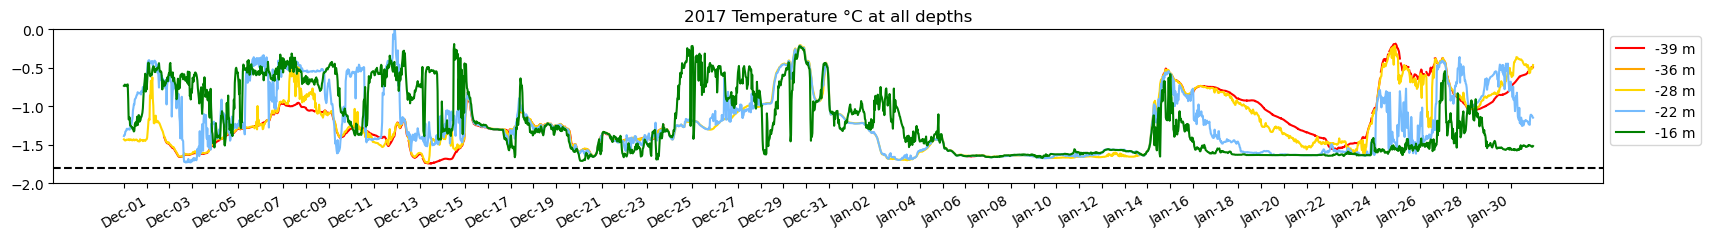

In [21]:
df_daily_size = pd.read_csv("/Users/reu/Box/Data/2017SIC.csv")
time_daily = pd.to_datetime(df_daily_size.time)

path1 = "/Users/reu/Box/Data/M1/M1_ocean_tempsalinity_2016_2017.nc"
path2 = "/Users/reu/Box/Data/M1/M1_ocean_tempsalinity_2017_2019.nc"
ds = xr.open_mfdataset([path1, path2])
ds.close

temps = ds.T.sel(time = slice(datetime(2016,12,1), datetime(2017,1,31,23)))

colors = ['red', 'orange', 'gold', 'xkcd:sky blue', 'green'] # 5 colors
fig, ax = plt.subplots(figsize = (20, 2))

for cc, depth in enumerate(temps.depth):
    plt.plot(temps.time, temps.sel(depth=depth).T, c = colors[cc], label=f'{depth.values:.0f} m')

plt.legend(bbox_to_anchor=(1,1))
plt.title(f"2017 Temperature °C at all depths")

#formatting the plot
date_list = pd.date_range(datetime(2016, 12, 1, 0), datetime(2017, 1, 31, 23))
plt.xticks(rotation=30)
plt.xticks(date_list)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
n = 2  # Keeps every 7th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
ax.set_ylim(-2,0)
ax.axhline(-1.8, color = 'black', linestyle = '--')

# axtwin = ax.twinx()
# axtwin.plot(time_daily, df_daily_size.Open_water_area_km2)

In [113]:
temps

<xarray.DataArray 'T' (depth: 5, time: 2975)>
dask.array<getitem, shape=(5, 2975), dtype=float64, chunksize=(5, 2975), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float64 -39.0 -36.0 -28.0 -22.0 -16.0
  * time     (time) datetime64[ns] 2016-12-01 ... 2017-01-31T23:00:00